In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = 1 - data.target
# ラベルの0と1を反転

X = X[:, :10]
from sklearn.linear_model import LogisticRegression
model_lor = LogisticRegression()
model_lor.fit(X, y)
y_pred = model_lor.predict(X)

In [6]:
# 混合行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[337  20]
 [ 30 182]]


In [9]:
# 正解率：予測結果全体に対して正しく予測できたものの割合
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9121265377855887

In [11]:
# 適合率：ポジティブ（1）と予測したものに対し、正しくポジティブと予測できたものの割合
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.900990099009901

In [13]:
# 再現率：実際にポジティブのものに対し、正しくポジティブと予測できたものの割合
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8584905660377359

In [15]:
# F値：適合率と再現率の両方の傾向を反映させた指標
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

In [18]:
# 予測確率：0に分類される確率・1に分類される確率
# scikit-learnの predit メソッドは0.5（50％）を閾値に判定された結果が用いられる
model_lor.predict_proba(X)

array([[7.67416961e-03, 9.92325830e-01],
       [2.03140599e-02, 9.79685940e-01],
       [2.34637374e-03, 9.97653626e-01],
       ...,
       [2.35217086e-02, 9.76478291e-01],
       [8.13271338e-06, 9.99991867e-01],
       [9.99572336e-01, 4.27663645e-04]])

In [28]:
# 予測確率が0.1（10％）以上の場合は1に分類する
import numpy as np
y_pred2 = (model_lor.predict_proba(X)[:, 1]>0.1).astype(np.int)
print(confusion_matrix(y, y_pred2))  # 左下のFN（False Negative）の数が減っている（＝実際には1のデータを0と間違って予測した数が減っている）
print(accuracy_score(y, y_pred2))
print(recall_score(y, y_pred2))  # 再現率が高くなった（＝実際sにポジティブであるものに対して正しくポジティブと予測できている）

[[267  90]
 [  6 206]]
0.8312829525483304
0.9716981132075472


In [31]:
# AUC：データ不均衡などでモデルがうまく学習できていない場合に対応する指標。
# ROC曲線：予測確率に対してどこからを陽性にするかという閾値を1から少しずつ下げていったときのFPとTPの関係の変化をグラフにしたもの。
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

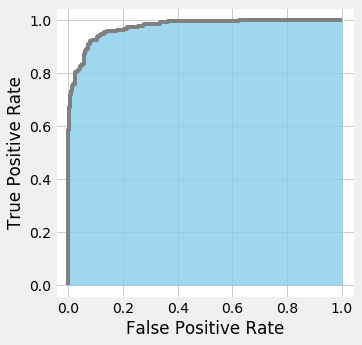

In [33]:
# roc_curve関数で出力された fpr, tpr を可視化
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5)

ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()

In [35]:
# AUCを求める（取りうる範囲は0〜1。1に近いほど精度が高い）
from sklearn.metrics import roc_auc_score
roc_auc_score(y, probas[:, 1])

0.9741557000158554